In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Main.csv")

In [3]:
df = df.drop("Unnamed: 0", axis =1)

In [4]:
df

,HomeTeam,AwayTeam,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,sum_of_home,sum_of_draw,sum_of_away
0,Aston Villa,West Ham,H,23,12,11,2,15,15,16,7,1,2,0,0,3.042857,3.092857,3.129643
1,Blackburn,Everton,H,7,17,2,12,19,14,1,3,2,1,0,0,2.833571,2.846786,2.820000
2,Bolton,Fulham,D,13,12,9,7,12,13,4,8,1,3,0,0,2.875000,2.910714,2.908929
3,Chelsea,West Brom,H,18,10,13,4,10,10,3,1,1,0,0,0,8.027857,8.218214,8.503929
4,Sunderland,Birmingham,D,6,13,2,7,13,10,3,6,3,3,1,0,2.887500,2.928571,2.932143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,Crystal Palace,Man United,H,6,10,3,4,12,22,3,6,2,4,0,0,2.964375,2.995625,2.908125
4556,Leicester,Southampton,H,12,7,6,2,10,5,3,3,0,1,0,0,3.123750,3.245625,3.233125
4557,Liverpool,Wolves,H,29,7,8,5,6,3,5,3,1,0,0,0,8.296875,8.725625,9.381875
4558,Man City,Aston Villa,H,24,4,5,2,5,11,13,1,0,1,0,0,8.463750,8.860000,9.485000


In [5]:
df.rename(columns={
    'HomeTeam': 'Home_Team',
    'AwayTeam': 'Away_Team',
    'sum_of_home': 'bet_of_away_team_winning',
    'sum_of_draw': 'bet_for_draw',
    'sum_of_away': 'bet_of_home_team_winning',
    'HS': 'Home_Shots',
    'AS': 'Away_Shots',
    'HST': 'Home_Shots_on_Target',
    'AST': 'Away_Shots_on_Target',
    'HF': 'Home_Fouls',
    'AF': 'Away_Fouls',
    'HC': 'Home_Corners',
    'AC': 'Away_Corners',
    'HY': 'Home_Yellow_Cards',
    'AY': 'Away_Yellow_Cards',
    'HR': 'Home_Red_Cards',
    'AR': 'Away_Red_Cards',
    'FTR' : 'Final_Game_Result'
}, inplace=True)

In [6]:
rows_with_na = df[df.isna().any(axis=1)]


In [7]:
rows_with_na

,Home_Team,Away_Team,Final_Game_Result,Home_Shots,Away_Shots,Home_Shots_on_Target,Away_Shots_on_Target,Home_Fouls,Away_Fouls,Home_Corners,Away_Corners,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards,bet_of_away_team_winning,bet_for_draw,bet_of_home_team_winning


In [8]:
numeric_columns = df.select_dtypes(exclude=['object'])

# Fill missing values in numeric columns with the mean
df[numeric_columns.columns] = df[numeric_columns.columns].fillna(df[numeric_columns.columns].mean())

Notes for Football Data

All data is in csv format, ready for use within standard spreadsheet applications. Please note that some abbreviations are no longer in use (in particular odds from specific bookmakers no longer used) and refer to data collected in earlier seasons. For a current list of what bookmakers are included in the dataset please visit http://www.football-data.co.uk/matches.php

Key to results data:

Div = League Division
Date = Match Date (dd/mm/yy)
Time = Time of match kick off
HomeTeam = Home Team
AwayTeam = Away Team
FTHG and HG = Full Time Home Team Goals
FTAG and AG = Full Time Away Team Goals
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
Attendance = Crowd Attendance
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HHW = Home Team Hit Woodwork
AHW = Away Team Hit Woodwork
HC = Home Team Corners
AC = Away Team Corners
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HFKC = Home Team Free Kicks Conceded
AFKC = Away Team Free Kicks Conceded
HO = Home Team Offsides
AO = Away Team Offsides
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
HBP = Home Team Bookings Points (10 = yellow, 25 = red)
ABP = Away Team Bookings Points (10 = yellow, 25 = red)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [10]:
label_encoder = LabelEncoder()
df['Home_Team'] = label_encoder.fit_transform(df['Home_Team'])
df['Away_Team'] = label_encoder.transform(df['Away_Team'])

In [11]:
#df['Winner'] = (df['bet_of_home_team_winning'] > df['bet_of_Away_team_winning']).astype(int)

In [12]:
#X = df[['Home_Shots', 'Away_Shots', 'Home_Shots_on_Target', 'Away_Shots_on_Target', 'Home_Fouls', 'Away_Fouls', 'Home_Corners', 'Away_Corners', 'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards', 'Away_Red_Cards']]
#y = df['Final_Game_Result']
X = df.drop(['Final_Game_Result'], axis=1)
y = df['Final_Game_Result']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [14]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

C:\Users\admin-dsinha1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [15]:
# Make predictions
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [16]:
# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6107456140350878
Confusion Matrix:
 [[184  24  59]
 [ 82  21 117]
 [ 50  23 352]]
Classification Report:
               precision    recall  f1-score   support

           A       0.58      0.69      0.63       267
           D       0.31      0.10      0.15       220
           H       0.67      0.83      0.74       425

    accuracy                           0.61       912
   macro avg       0.52      0.54      0.51       912
weighted avg       0.56      0.61      0.56       912



Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.4769736842105263
Confusion Matrix:
 [[120  83  64]
 [ 75  70  75]
 [ 84  96 245]]
Classification Report:
               precision    recall  f1-score   support

           A       0.43      0.45      0.44       267
           D       0.28      0.32      0.30       220
           H       0.64      0.58      0.61       425

    accuracy                           0.48       912
   macro avg       0.45      0.45      0.45       912
weighted avg       0.49      0.48      0.48       912



Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6030701754385965
Confusion Matrix:
 [[174  27  66]
 [ 78  40 102]
 [ 57  32 336]]
Classification Report:
               precision    recall  f1-score   support

           A       0.56      0.65      0.60       267
           D       0.40      0.18      0.25       220
           H       0.67      0.79      0.72       425

    accuracy                           0.60       912
   macro avg       0.54      0.54      0.53       912
weighted avg       0.57      0.60      0.57       912



SVM

In [22]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6140350877192983
Confusion Matrix:
 [[178  23  66]
 [ 80  21 119]
 [ 45  19 361]]
Classification Report:
               precision    recall  f1-score   support

           A       0.59      0.67      0.62       267
           D       0.33      0.10      0.15       220
           H       0.66      0.85      0.74       425

    accuracy                           0.61       912
   macro avg       0.53      0.54      0.51       912
weighted avg       0.56      0.61      0.57       912



In [24]:
# Get unique teams from the "Home_Team" and "Away_Team" columns
unique_teams = pd.concat([df["Home_Team"], df["Away_Team"]]).unique()

# Convert the result to a list if needed
team_list = unique_teams.tolist()

import itertools

unique_teams = pd.concat([df["Home_Team"], df["Away_Team"]]).unique()
match_combinations = list(itertools.combinations(unique_teams, 2))
predictions = []

for home_team, away_team in match_combinations:
    features = df[['Home_Shots', 'Away_Shots', 'Home_Shots_on_Target', 'Away_Shots_on_Target', 'Home_Fouls', 'Away_Fouls', 'Home_Corners', 'Away_Corners', 'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards', 'Away_Red_Cards']]
    
    # Assuming you have an SVM classifier named svm_classifier
    outcome = decision_tree.predict()
    
    # Append the predictions as a dictionary
    predictions.append({"Home_Team": home_team, "Away_Team": away_team, "Predicted_Outcome": outcome[0]})

predictions_df = pd.DataFrame(predictions)


In [25]:
#predictions_df

In [26]:
number_to_string_mapping = {i: team for i, team in enumerate(label_encoder.classes_)}

# Print the number-to-string mapping
print(number_to_string_mapping)

{0: 'Arsenal', 1: 'Aston Villa', 2: 'Birmingham', 3: 'Blackburn', 4: 'Blackpool', 5: 'Bolton', 6: 'Bournemouth', 7: 'Brentford', 8: 'Brighton', 9: 'Burnley', 10: 'Cardiff', 11: 'Chelsea', 12: 'Crystal Palace', 13: 'Everton', 14: 'Fulham', 15: 'Huddersfield', 16: 'Hull', 17: 'Leeds', 18: 'Leicester', 19: 'Liverpool', 20: 'Man City', 21: 'Man United', 22: 'Middlesbrough', 23: 'Newcastle', 24: 'Norwich', 25: 'QPR', 26: 'Reading', 27: 'Sheffield United', 28: 'Southampton', 29: 'Stoke', 30: 'Sunderland', 31: 'Swansea', 32: 'Tottenham', 33: 'Watford', 34: 'West Brom', 35: 'West Ham', 36: 'Wigan', 37: 'Wolves'}


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)



Accuracy: 0.60
Confusion Matrix:
[[178  23  66]
 [ 86  31 103]
 [ 57  26 342]]
Classification Report:
              precision    recall  f1-score   support

           A       0.55      0.67      0.61       267
           D       0.39      0.14      0.21       220
           H       0.67      0.80      0.73       425

    accuracy                           0.60       912
   macro avg       0.54      0.54      0.51       912
weighted avg       0.57      0.60      0.57       912



In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

Accuracy: 0.50
Confusion Matrix:
[[156  60  51]
 [ 86  52  82]
 [101  76 248]]
Classification Report:
              precision    recall  f1-score   support

           A       0.45      0.58      0.51       267
           D       0.28      0.24      0.25       220
           H       0.65      0.58      0.62       425

    accuracy                           0.50       912
   macro avg       0.46      0.47      0.46       912
weighted avg       0.50      0.50      0.50       912



In [29]:
a= input("Enter the home team")
b= input("Enter the away team")
print(a,b)

for k,v in number_to_string_mapping.items():
    if a == v:
       home_name = k
    if b == v:
       away_name = k

Enter the home team Arsenal
Enter the away team Man United


Arsenal Man United


In [30]:
# Assuming you have trained your Random Forest classifier and loaded the necessary libraries as mentioned in your code.

# Filter the DataFrame for the specified team
team_data = df[(df['Home_Team'] == home_name) | (df['Away_Team'] == away_name)]
home_team_data = df[df['Home_Team'] == home_name]
away_team_data = df[df['Away_Team'] == away_name]
# Calculate mean values for all features for the specified team
mean_home_shots = home_team_data['Home_Shots'].mean()
mean_away_shots = away_team_data['Away_Shots'].mean()
mean_home_shots_on_target = home_team_data['Home_Shots_on_Target'].mean()
mean_away_shots_on_target = away_team_data['Away_Shots_on_Target'].mean()
mean_home_fouls = home_team_data['Home_Fouls'].mean()
mean_away_fouls = away_team_data['Away_Fouls'].mean()
mean_home_corners = home_team_data['Home_Corners'].mean()
mean_away_corners = away_team_data['Away_Corners'].mean()
mean_home_yellow_cards = home_team_data['Home_Yellow_Cards'].mean()
mean_away_yellow_cards = away_team_data['Away_Yellow_Cards'].mean()
mean_home_red_cards = home_team_data['Home_Red_Cards'].mean()
mean_away_red_cards = away_team_data['Away_Red_Cards'].mean()
mean_bet_of_away_team_winning = team_data['bet_of_away_team_winning'].mean()
mean_bet_for_draw = team_data['bet_for_draw'].mean()
mean_bet_of_home_team_winning = home_team_data['bet_of_home_team_winning'].mean()

# Prepare data for the match you want to predict with mean values
match_data = pd.DataFrame({
    "Home_Team" : [home_name],
    "Away_Team" : [away_name],
    'Home_Shots': [mean_home_shots],  # Add these missing features
    'Away_Shots': [mean_away_shots],
    'Home_Shots_on_Target': [mean_home_shots_on_target],
    'Away_Shots_on_Target': [mean_away_shots_on_target],
    'Home_Fouls': [mean_home_fouls],
    'Away_Fouls': [mean_away_fouls],
    'Home_Corners': [mean_home_corners],
    'Away_Corners': [mean_away_corners],
    'Home_Yellow_Cards': [mean_home_yellow_cards],
    'Away_Yellow_Cards': [mean_away_yellow_cards],
    'Home_Red_Cards': [mean_home_red_cards],
    'Away_Red_Cards': [mean_away_red_cards],
    'bet_of_away_team_winning': [mean_bet_of_away_team_winning],
    'bet_for_draw': [mean_bet_for_draw],
    'bet_of_home_team_winning': [mean_bet_of_home_team_winning]
})

In [32]:
# Use the trained Random Forest classifier to make the prediction
result = svm_classifier.predict(match_data)

# Interpret the result
if result == 'H':
    print(f"{a} is predicted to win.")
elif result == 'A':
    print(f"{b} is predicted to win.")
else:
    print("The match is predicted to be a draw.")

Arsenal is predicted to win.


C:\Users\admin-dsinha1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [1]:
import pandas as pd

def Data(df):
    list_to_include=[]
    rows=df.columns
    hw,aw=rows.get_loc('HomeTeam'),rows.get_loc('AwayTeam')
    ftr=rows.get_loc('FTR')
    hs=rows.get_loc('HS')
    bb1x2=rows.get_loc('Bb1X2')
    last=rows.get_loc(rows[-1])
    list_to_include.append(hw)
    list_to_include.append(aw)
    list_to_include.append(ftr)
    list_to_include.append(hs)
    hstobb1x2=list(range(hs,bb1x2))
    list_to_include+=hstobb1x2

    list_to_include
    col_drop=[]
    for i in range (len(rows)):
        if i not in list_to_include:
            col_drop.append(rows[i])
    df = df.drop(columns=col_drop)

    rows=df.columns
    b365h=rows.get_loc('B365H')
    last=rows.get_loc(rows[-1])
    list1,list2,list3=[],[],[]
    for i in range (b365h,last-1):
        list1.append(rows[i])
        list2.append(rows[i+1])
        list3.append(rows[i+2])
    df["sum_of_home"] = df[list1].mean(axis=1)
    df["sum_of_draw"] = df[list2].mean(axis=1)
    df["sum_of_away"] = df[list3].mean(axis=1)
    rows=df.columns
    b365h=rows.get_loc('B365H')
    last=rows.get_loc('sum_of_home')
    col_drop=[]
    for i in range (b365h,last):
        col_drop.append(rows[i])
    df = df.drop(columns=col_drop)
    rows=df.columns
    for i in (3,len(rows)-1):
        df[rows[i]].fillna(df[rows[i]].mean(), inplace=True)
    return df

10-11.csv


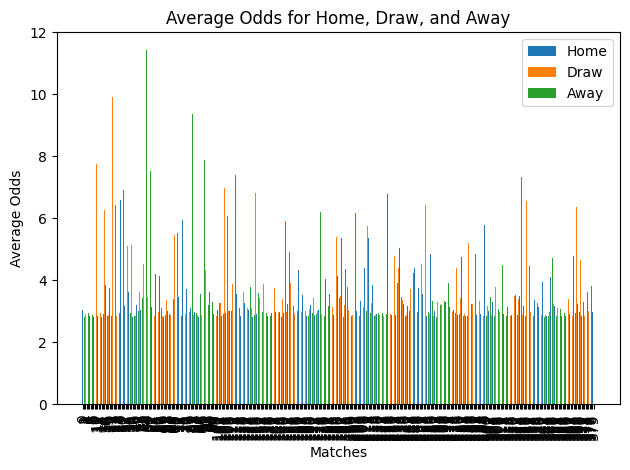

11-12.csv


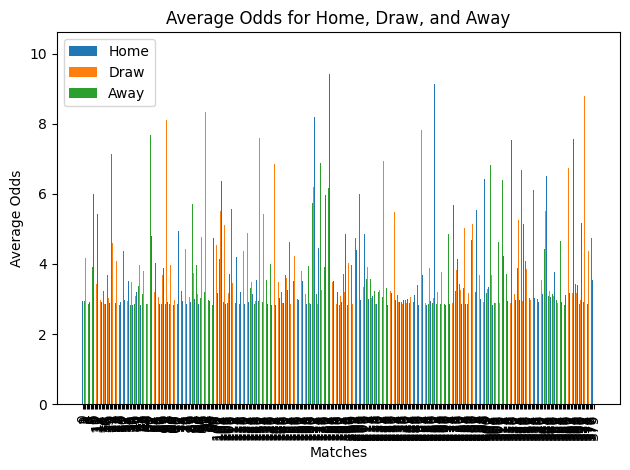

12-13.csv


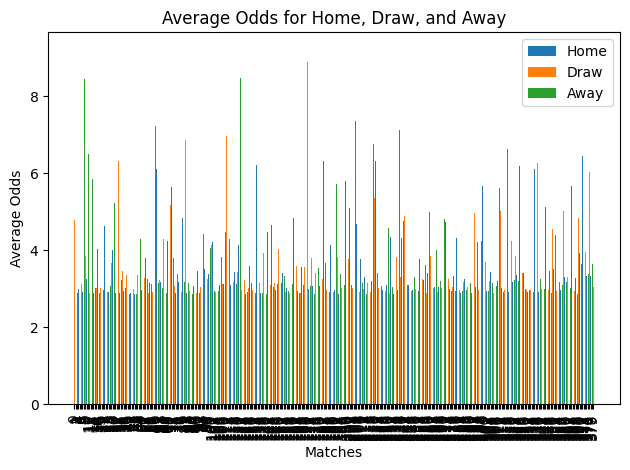

13-14.csv


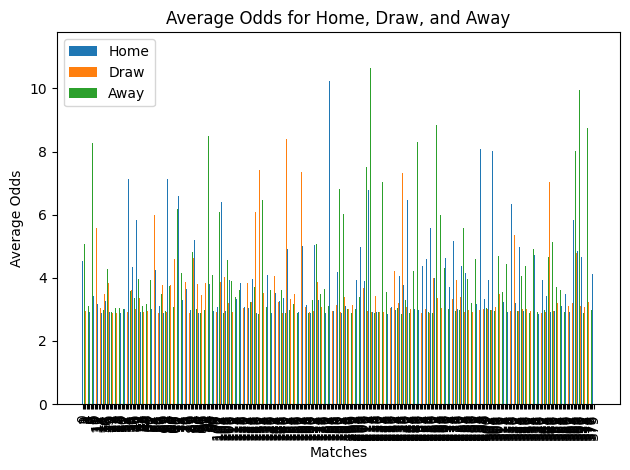

14-15.csv


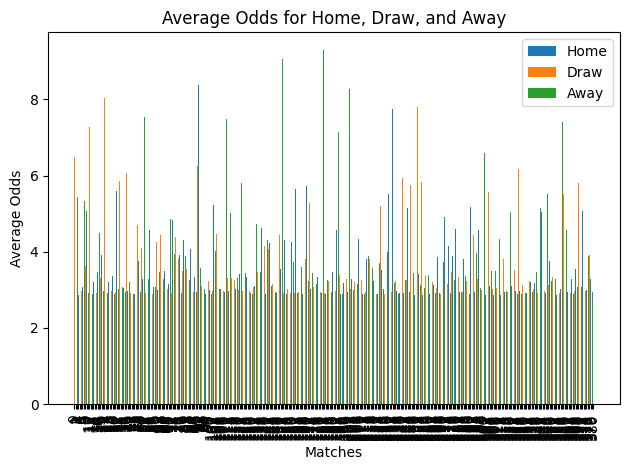

15-16.csv


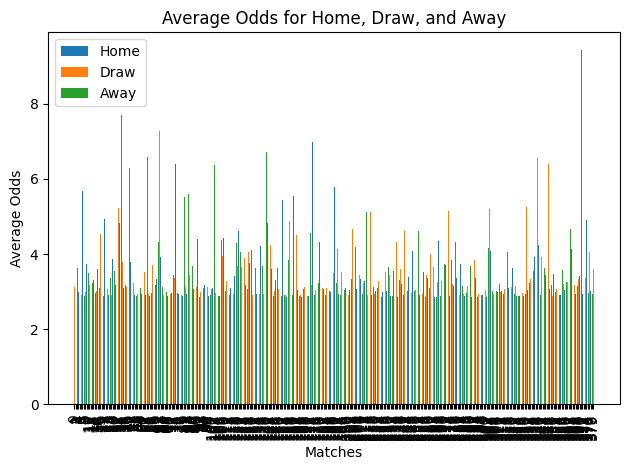

16-17.csv


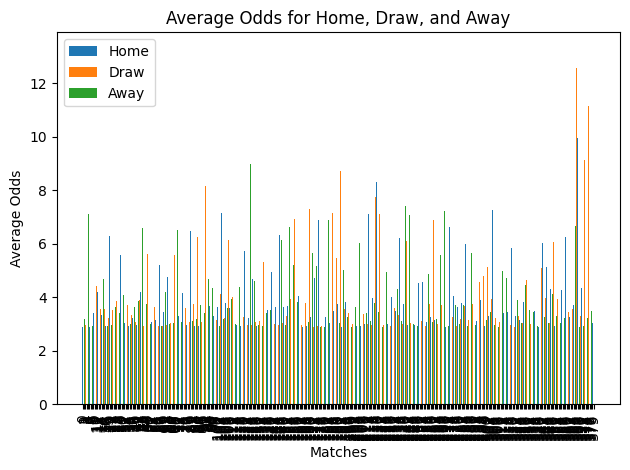

17-18.csv


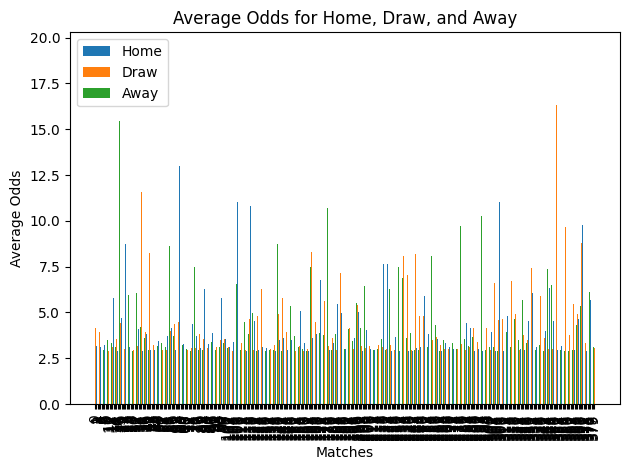

18-19.csv


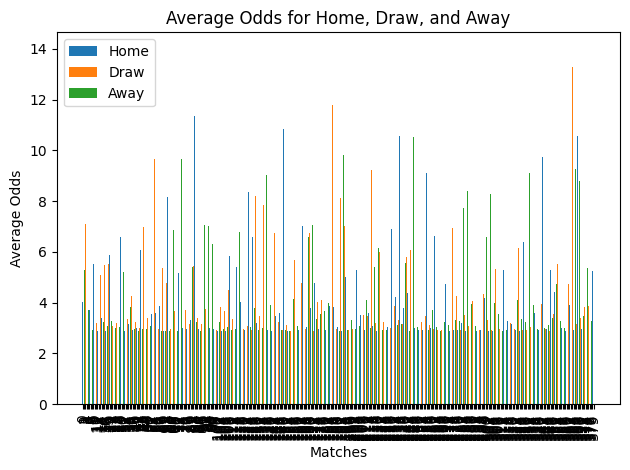

19-20.csv


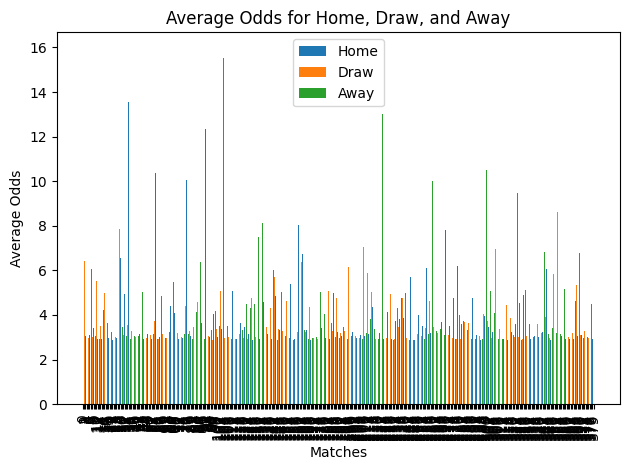

20-21.csv


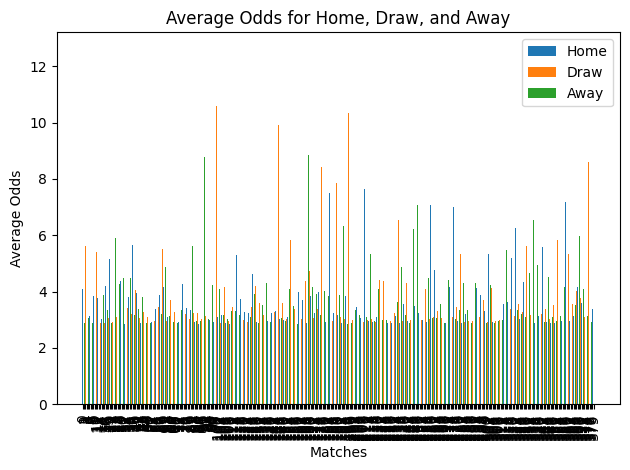

21-22.csv


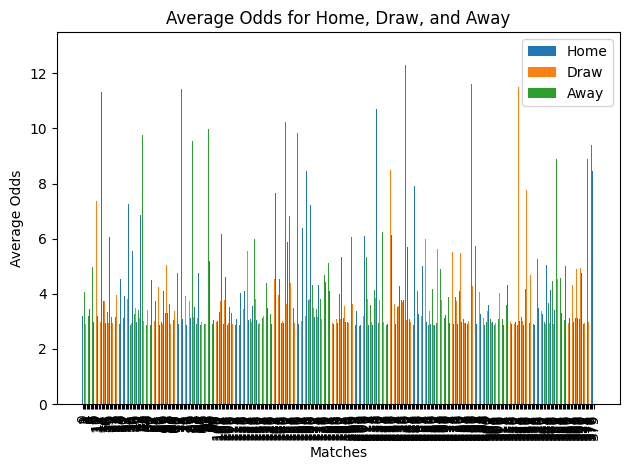

,HomeTeam,AwayTeam,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,sum_of_home,sum_of_draw,sum_of_away
0,Aston Villa,West Ham,H,23.0,12.0,11.0,2.0,15.0,15.0,16.0,7.0,1.0,2.0,0.0,0.0,3.042857,3.092857,3.129643
1,Blackburn,Everton,H,7.0,17.0,2.0,12.0,19.0,14.0,1.0,3.0,2.0,1.0,0.0,0.0,2.833571,2.846786,2.820000
2,Bolton,Fulham,D,13.0,12.0,9.0,7.0,12.0,13.0,4.0,8.0,1.0,3.0,0.0,0.0,2.875000,2.910714,2.908929
3,Chelsea,West Brom,H,18.0,10.0,13.0,4.0,10.0,10.0,3.0,1.0,1.0,0.0,0.0,0.0,8.027857,8.218214,8.503929
4,Sunderland,Birmingham,D,6.0,13.0,2.0,7.0,13.0,10.0,3.0,6.0,3.0,3.0,1.0,0.0,2.887500,2.928571,2.932143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556,Crystal Palace,Man United,H,6.0,10.0,3.0,4.0,12.0,22.0,3.0,6.0,2.0,4.0,0.0,0.0,2.964375,2.995625,2.908125
4557,Leicester,Southampton,H,12.0,7.0,6.0,2.0,10.0,5.0,3.0,3.0,0.0,1.0,0.0,0.0,3.123750,3.245625,3.233125
4558,Liverpool,Wolves,H,29.0,7.0,8.0,5.0,6.0,3.0,5.0,3.0,1.0,0.0,0.0,0.0,8.296875,8.725625,9.381875
4559,Man City,Aston Villa,H,24.0,4.0,5.0,2.0,5.0,11.0,13.0,1.0,0.0,1.0,0.0,0.0,8.463750,8.860000,9.485000


In [4]:
import pandas as pd

# List of file names
file_names = [
    '10-11.csv',
    '11-12.csv',
    '12-13.csv',
    '13-14.csv',
    '14-15.csv',
    '15-16.csv',
    '16-17.csv',
    '17-18.csv',
    '18-19.csv',
    '19-20.csv',
    '20-21.csv',
    '21-22.csv'
]

dataframes=pd.DataFrame()
# Loop through the file names and process each DataFrame
for i in range(len(file_names)):
    df = pd.read_csv(file_names[i])
    df=Data(df)
    print(file_names[i])
    plot_data(df)
    dataframes = pd.concat([dataframes, df],axis=0,ignore_index=True)

dataframes
